## MODEL TRAINING 
### import data and require packages

In [7]:
## basis import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# modellinf
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [8]:
df = pd.read_csv('study_performance.csv')

In [9]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## x and y variable

In [10]:
x = df.drop(columns=['math_score'],axis=1)

In [11]:
y = df['math_score']

In [ ]:
## create column tranformer with 3 types of transformers
num_features =  x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
   [ 
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features)
   ] 
    
)

In [16]:
x = preprocessor.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [19]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'ridge':Ridge(),
    'K- neighbors regressor':KNeighborsRegressor(),
    'Decission Tree': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=False),
    'AdaBoostRegressor': AdaBoostRegressor()
    
    
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    # make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # evaluate train and test dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2= evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training set')
    print('- root mean squared error: {:.4f}'.format(model_train_rmse))
    print('- mean absolute error: {:.4f}'.format(model_train_mae))
    print('- r2 score: {:.4f}'.format(model_train_r2))
    
    print("--"*10)
    
    print('model perforamnce fro the test set')
    print('- root mean squared error: {:.4f}'.format(model_test_rmse))
    print('- mean absolute error: {:.4f}'.format(model_test_mae))
    print('- r2 score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    
    
    

Linear Regression
model performance for training set
- root mean squared error: 5.3110
- mean absolute error: 4.2237
- r2 score: 0.8774
--------------------
model perforamnce fro the test set
- root mean squared error: 5.3986
- mean absolute error: 4.3503
- r2 score: 0.8704


Lasso
model performance for training set
- root mean squared error: 6.5415
- mean absolute error: 5.1315
- r2 score: 0.8139
--------------------
model perforamnce fro the test set
- root mean squared error: 6.8436
- mean absolute error: 5.5248
- r2 score: 0.7917


ridge
model performance for training set
- root mean squared error: 5.3113
- mean absolute error: 4.2230
- r2 score: 0.8773
--------------------
model perforamnce fro the test set
- root mean squared error: 5.4014
- mean absolute error: 4.3516
- r2 score: 0.8703


K- neighbors regressor
model performance for training set
- root mean squared error: 6.0368
- mean absolute error: 4.7753
- r2 score: 0.8415
--------------------
model perforamnce fro the test 

### result 
- linar regression is performing well


In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred =lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.04


### plot y_pred and y_test

Text(0, 0.5, 'predicted')

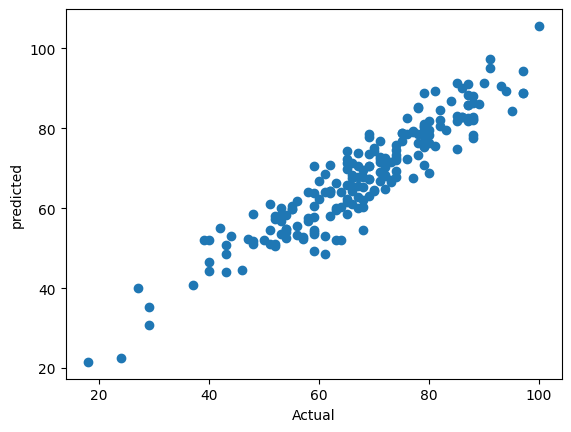

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

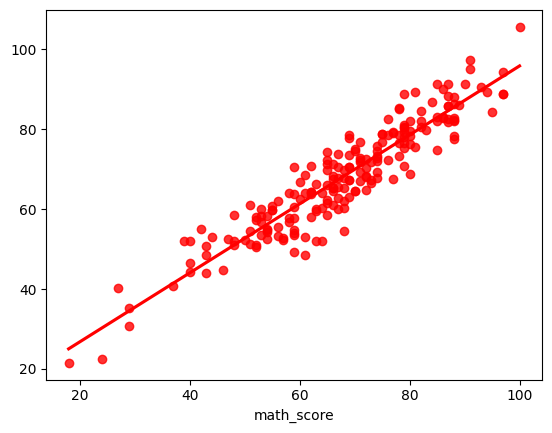

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [27]:
pred_df = pd.DataFrame({'actual_value': y_test,'predicted_value':y_pred,'defference':y_test - y_pred})
pred_df

,actual_value,predicted_value,defference
858,52,51.114625,0.885375
986,40,46.520975,-6.520975
183,65,62.219553,2.780447
502,63,60.038781,2.961219
710,93,90.678830,2.321170
...,...,...,...
27,67,65.489881,1.510119
244,75,76.925242,-1.925242
294,78,78.654367,-0.654367
176,46,44.655158,1.344842
